#### Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("Company_Data.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data1 = data.copy()
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
x = data1.iloc[:,1:]
y = data1.iloc[:,0]

In [8]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
label_encoder = preprocessing.LabelEncoder()
x['ShelveLoc'] = label_encoder.fit_transform(x['ShelveLoc'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])
x['US'] = label_encoder.fit_transform(x['US'])


In [10]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [11]:
y = data[['Sales']]

In [12]:
y

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [13]:
y['Sales'] = ['small' if x<=7.40 else 'large' for x in y['Sales']]

C:\Users\parvin\AppData\Local\Temp\ipykernel_20096\4092798373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Sales'] = ['small' if x<=7.40 else 'large' for x in y['Sales']]


In [14]:
y

,Sales
0,large
1,large
2,large
3,small
4,small
...,...
395,large
396,small
397,large
398,small


In [15]:
y.Sales.value_counts()

large    206
small    194
Name: Sales, dtype: int64

In [16]:
x.columns


Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [17]:
# splitting the data set into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [18]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,2,49,13,0,0
69,127,59,0,339,99,2,65,12,1,0
203,131,82,0,132,157,0,25,14,1,0
379,125,111,0,404,107,0,54,15,1,0
261,121,42,4,188,118,2,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,0,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [19]:
y_train

,Sales
85,large
69,large
203,small
379,small
261,small
...,...
306,small
165,small
7,large
219,large


# Building Decision tree Classifier using Entropy Criteria

In [20]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

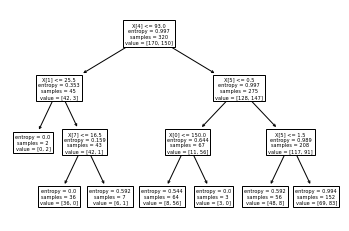

In [21]:
tree.plot_tree(model);

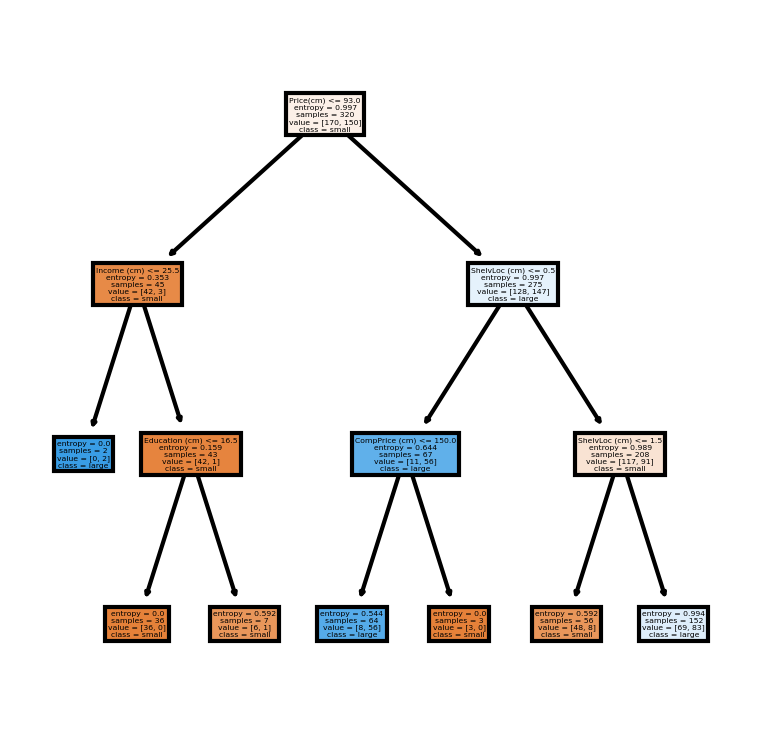

In [22]:
fn = ['CompPrice (cm)','Income (cm)','Advertising (cm)','Population (cm)','Price(cm)','ShelvLoc (cm)','Age (cm)','Education (cm)','Urban (cm)','US (cm)']
cn = ['small','large']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(model,
              feature_names = fn,
              class_names=cn,
              filled=True);

In [23]:
#predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

small    47
large    33
dtype: int64

In [24]:
y_test

,Sales
132,large
390,small
310,large
3,small
248,small
...,...
361,large
197,small
23,small
54,small


In [25]:
y_test.value_counts()

Sales
small    44
large    36
dtype: int64

In [26]:
preds

array(['large', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'large', 'large', 'small', 'large',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'large', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'large', 'small', 'large', 'large',
       'large', 'large', 'large', 'small', 'large', 'small', 'small',
       'small', 'small', 'small'], dtype=object)

In [27]:
#Accuracy
model.score(x_test,y_test)


0.7125

## With Gini Criteria build a Decision Tree Classifier


In [28]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [29]:
model2_gini

DecisionTreeClassifier(max_depth=4)

In [30]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=4)

In [31]:
# Predicting on test data

prediction2=model2_gini.predict(x_test)

In [32]:
prediction2

array(['small', 'small', 'small', 'large', 'large', 'small', 'large',
       'large', 'small', 'large', 'small', 'large', 'small', 'large',
       'large', 'large', 'large', 'large', 'small', 'large', 'large',
       'large', 'large', 'large', 'small', 'small', 'large', 'small',
       'large', 'large', 'large', 'large', 'large', 'large', 'small',
       'large', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'large', 'small', 'large', 'large', 'small', 'small',
       'large', 'small', 'small', 'large', 'large', 'small', 'small',
       'large', 'large', 'large', 'small', 'small', 'small', 'large',
       'large', 'small', 'large', 'large', 'small', 'large', 'large',
       'large', 'large', 'large', 'large', 'large', 'small', 'small',
       'small', 'small', 'large'], dtype=object)

In [33]:
pd.Series(prediction2).value_counts()

large    47
small    33
dtype: int64

In [34]:
model2_gini.score(x_test,y_test)

0.6625

In [35]:
model.feature_importances_



array([0.08726272, 0.09429533, 0.        , 0.        , 0.3036944 ,
       0.48650471, 0.        , 0.02824283, 0.        , 0.        ])

In [36]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [37]:
fi

,feature,importance
5,ShelveLoc,0.486505
4,Price,0.303694
1,Income,0.094295
0,CompPrice,0.087263
7,Education,0.028243
2,Advertising,0.000000
3,Population,0.000000
6,Age,0.000000
8,Urban,0.000000
9,US,0.000000


In [38]:
model2_gini.feature_importances_

array([0.13310942, 0.06305328, 0.03051162, 0.        , 0.34223025,
       0.32680862, 0.10126718, 0.00301964, 0.        , 0.        ])

In [42]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model2_gini.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [43]:
fi

,feature,importance
4,Price,0.342230
5,ShelveLoc,0.326809
0,CompPrice,0.133109
6,Age,0.101267
1,Income,0.063053
2,Advertising,0.030512
7,Education,0.003020
3,Population,0.000000
8,Urban,0.000000
9,US,0.000000


In [44]:
#Price is the most important feature